# Credit Risk Assessment & Default Prediction

## Overview
This project builds an end-to-end credit risk assessment model to predict the probability
of customer default. It supports data-driven lending decisions and portfolio risk
management for financial institutions by identifying risky customers early and enabling
risk-based strategies.

## Business Objective

The objectives of this project are:
- Identify high-risk customers before credit approval
- Understand key factors influencing default behavior
- Segment customers into actionable risk categories (Low, Medium, High)
- Support informed and responsible lending decisions

In [1]:
# Data manipulation & analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay

# For Google Colab Drive access
from google.colab import drive

# Plot settings
sns.set(style="whitegrid")

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv('/content/drive/My Drive/credit-risk-assessment/data/raw/credit_data.csv')

# Preview first rows
df.head()

Mounted at /content/drive


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Data Understanding

The dataset contains customer demographic details, financial attributes,
and repayment history. The target variable indicates whether a customer
defaulted on the next payment cycle.

In [3]:
# Dataset shape and info
print(df.shape)
df.info()

# Check missing values
df.isnull().sum()

(30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2          

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


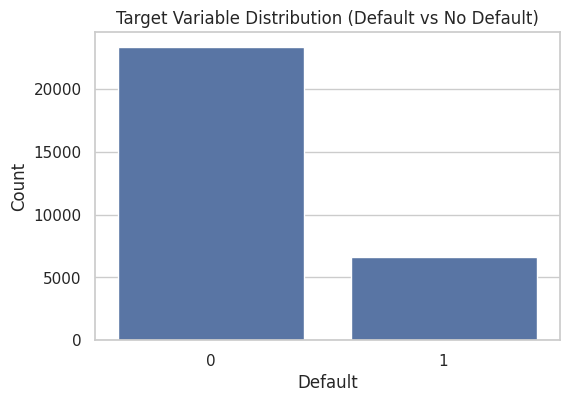

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='default.payment.next.month', data=df)
plt.title('Target Variable Distribution (Default vs No Default)')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

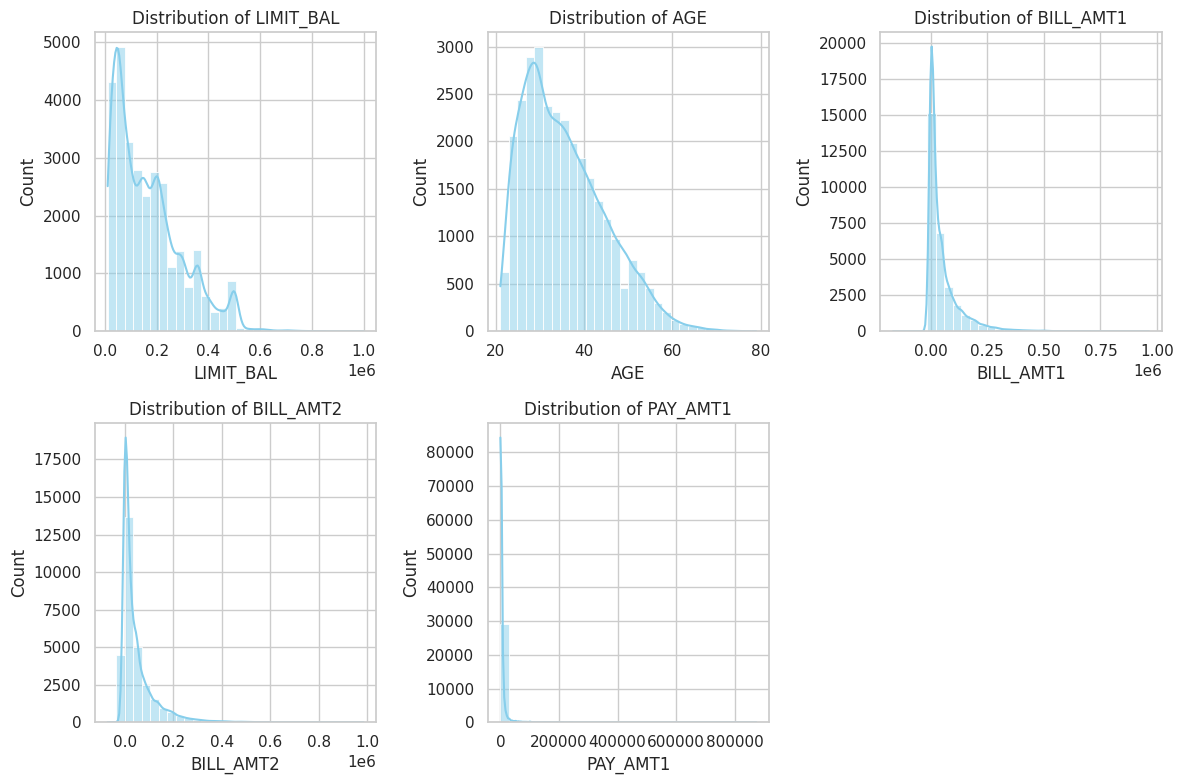

In [5]:
numeric_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'PAY_AMT1']
plt.figure(figsize=(12,8))

for i, col in enumerate(numeric_features):
    plt.subplot(2,3,i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

/tmp/ipython-input-2781699845.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='default.payment.next.month', data=df, ci=None)
/tmp/ipython-input-2781699845.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='default.payment.next.month', data=df, ci=None)
/tmp/ipython-input-2781699845.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y='default.payment.next.month', data=df, ci=None)


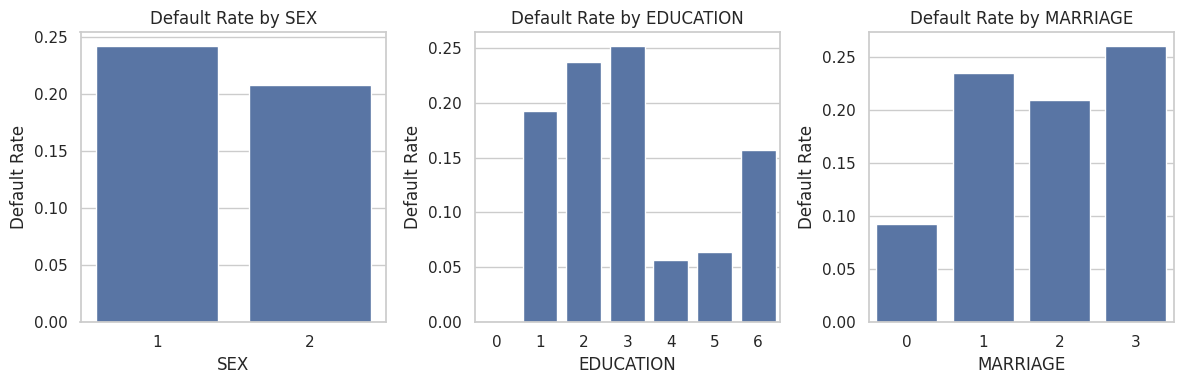

In [6]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

plt.figure(figsize=(12,4))
for i, col in enumerate(categorical_features):
    plt.subplot(1,3,i+1)
    sns.barplot(x=col, y='default.payment.next.month', data=df, ci=None)
    plt.title(f'Default Rate by {col}')
    plt.ylabel('Default Rate')

plt.tight_layout()
plt.show()

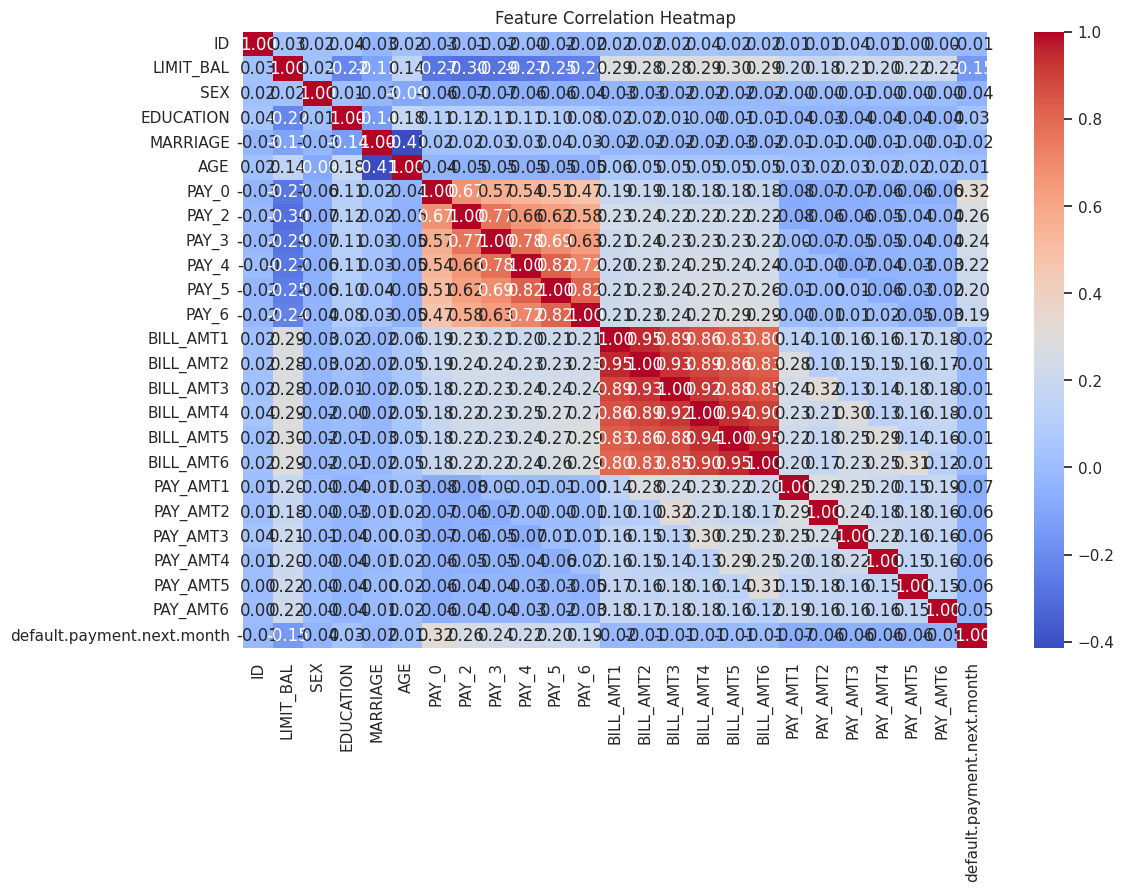

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()

## Feature Engineering

Non-informative identifiers were removed. Relevant demographic,
financial, and repayment behavior features were selected for modeling.

In [8]:
X = df.drop(columns=['ID', 'default.payment.next.month'])
y = df['default.payment.next.month']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

## Model Building

A Logistic Regression model was developed to estimate the probability
of customer default. Logistic regression is widely used in financial
risk modeling due to its interpretability.

In [10]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## Model Validation & Evaluation

Model performance was evaluated using classification metrics and ROC-AUC
to assess predictive capability and risk discrimination.

In [11]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7009
           1       0.65      0.24      0.35      1991

    accuracy                           0.80      9000
   macro avg       0.74      0.60      0.62      9000
weighted avg       0.78      0.80      0.77      9000

ROC-AUC Score: 0.6854859924303394


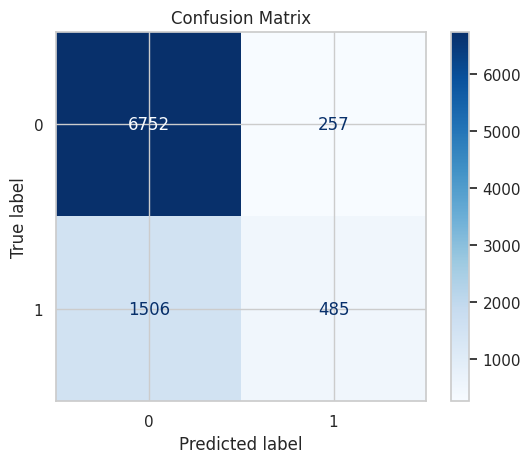

In [12]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

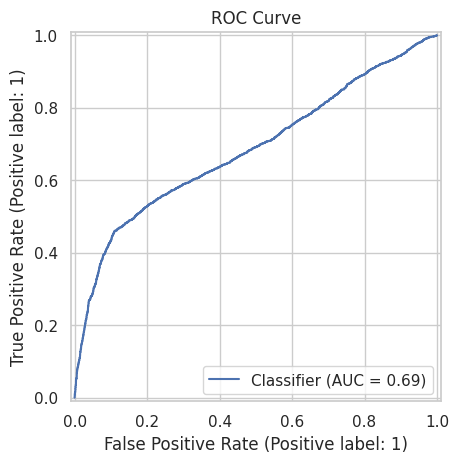

In [13]:
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title('ROC Curve')
plt.show()

/tmp/ipython-input-687681337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=coef_df, palette='coolwarm')


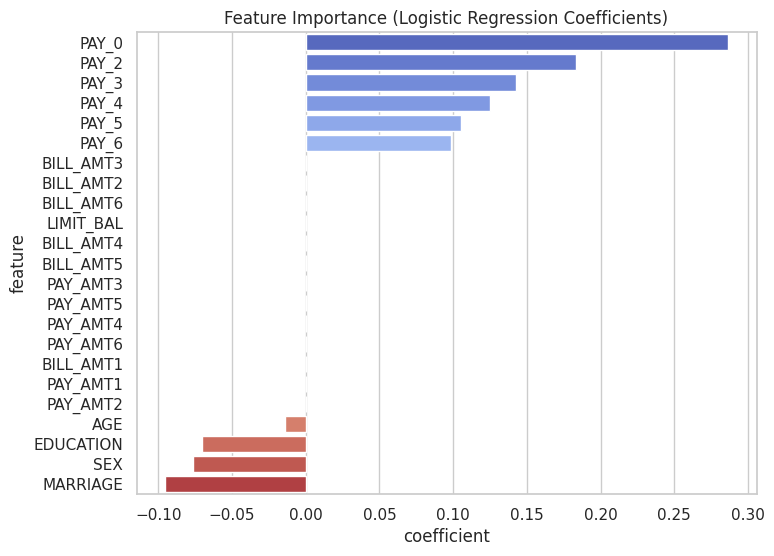

In [14]:
coef_df = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='coefficient', y='feature', data=coef_df, palette='coolwarm')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

## Risk Segmentation

Customers were segmented into Low, Medium, and High-risk groups based
on predicted default probabilities to support business decision-making.

In [15]:
risk_df = X_test.copy()
risk_df['default_probability'] = y_prob

risk_df['risk_segment'] = pd.cut(
    risk_df['default_probability'],
    bins=[0,0.3,0.6,1.0],
    labels=['Low Risk','Medium Risk','High Risk']
)

# Count of each risk segment
risk_df['risk_segment'].value_counts()

,count
risk_segment,
Low Risk,7239
Medium Risk,1309
High Risk,452


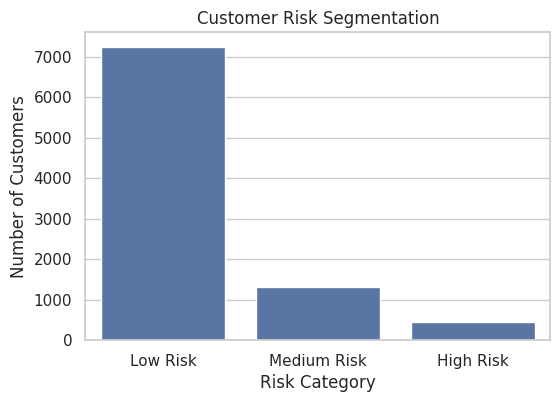

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='risk_segment', data=risk_df, order=['Low Risk','Medium Risk','High Risk'])
plt.title('Customer Risk Segmentation')
plt.xlabel('Risk Category')
plt.ylabel('Number of Customers')
plt.show()

## Business Insights & Recommendations

- Low Risk customers can be offered standard or preferential credit terms.
- Medium Risk customers require additional verification or reduced credit limits.
- High Risk customers show a high probability of default and should be declined
  or offered collateral-backed products.

This segmentation enables financial institutions to reduce default losses,
optimize portfolio risk, and apply risk-based pricing strategies.

## Key Outcomes

- Developed a logistic regression credit risk model with strong predictive performance
- Optimized classification decisions to minimize financial risk exposure
- Segmented customers into actionable risk categories
- Generated structured outputs for downstream business teams

## Business Impact

The insights from this project help financial institutions to:
- Reduce credit losses
- Apply risk-based pricing
- Improve portfolio risk management
- Make informed, data-driven lending decisions